<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 8. Домашнее задание начального уровня


Обучите модель DBSCAN с параметром *min_samples=8*. Визуализируйте результат.

Обучающая выборка содержит 300 точек
Найдено кластеров: 4
Точек, помеченных как шум: 49
Размеры кластеров:
  Кластер 0: 79 точек
  Кластер 1: 80 точек
  Кластер 2: 85 точек
  Кластер 3: 7 точек


/tmp/ipython-input-1661613979.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1],


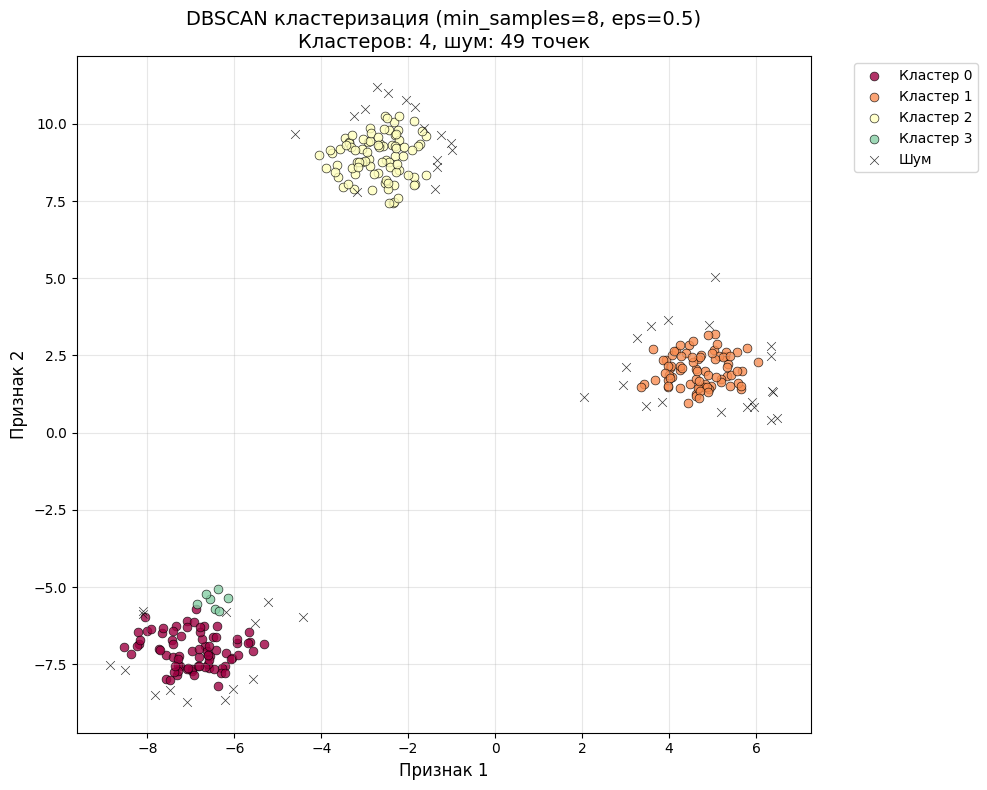


Подбор параметра eps для min_samples=8:


/tmp/ipython-input-1661613979.py:95: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(xy[:, 0], xy[:, 1],
/tmp/ipython-input-1661613979.py:95: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(xy[:, 0], xy[:, 1],
/tmp/ipython-input-1661613979.py:95: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(xy[:, 0], xy[:, 1],
/tmp/ipython-input-1661613979.py:95: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may cha

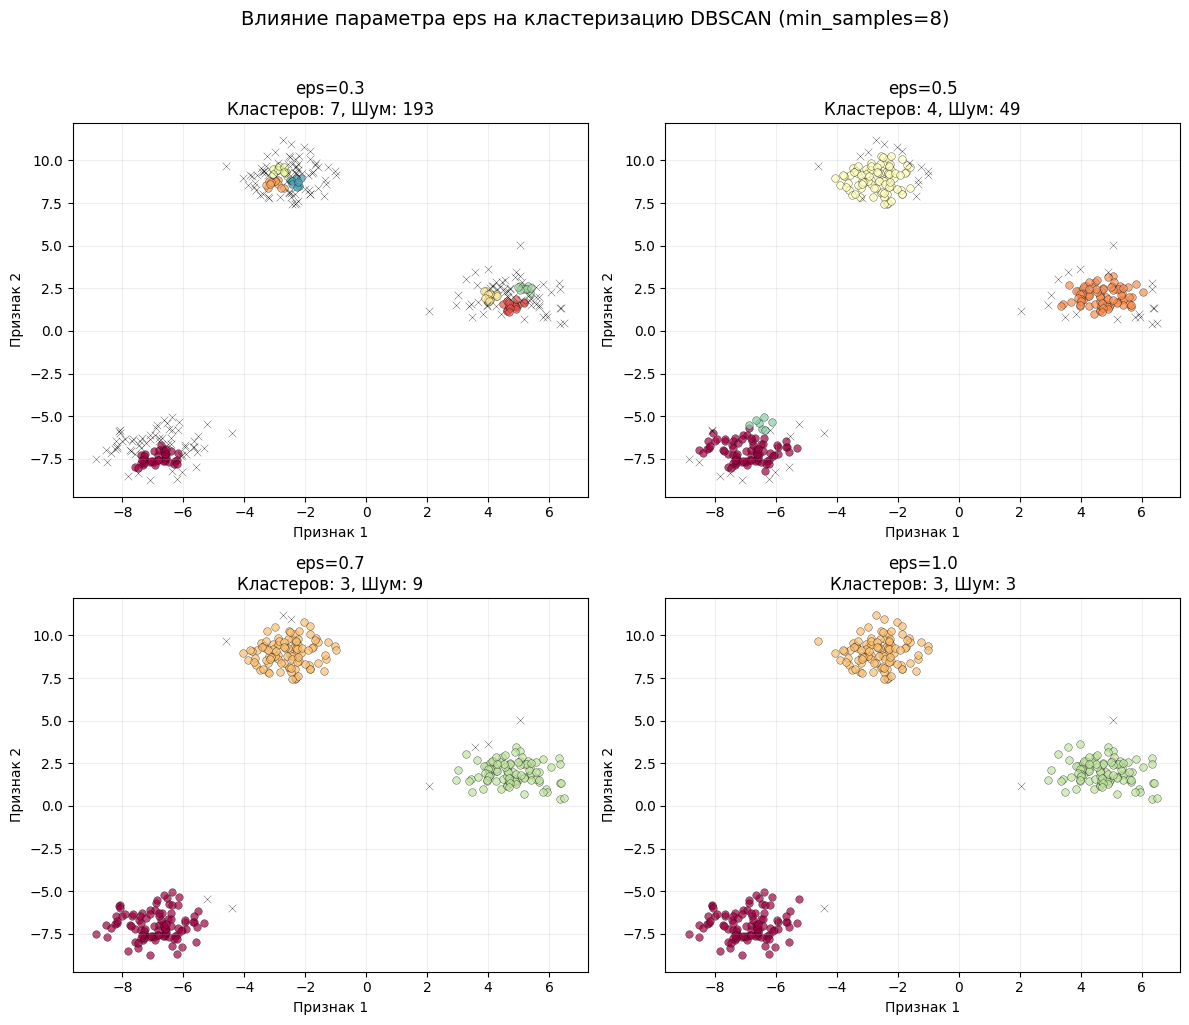

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Создадим искусственные данные для демонстрации (поскольку файл clustering.pkl недоступен)
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

# Обучаем модель DBSCAN с параметром min_samples=8
# Параметр eps нужно подобрать эмпирически, начнем с 0.5
dbscan_model = DBSCAN(eps=0.5, min_samples=8)
dbscan_model.fit(X)

# Получаем метки кластеров
labels = dbscan_model.labels_

# Определяем количество кластеров (исключая шум, помеченный как -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Обучающая выборка содержит {X.shape[0]} точек")
print(f"Найдено кластеров: {n_clusters}")
print(f"Точек, помеченных как шум: {n_noise}")

if n_clusters > 0:
    print(f"Размеры кластеров:")
    for i in range(n_clusters):
        cluster_size = list(labels).count(i)
        print(f"  Кластер {i}: {cluster_size} точек")

# Визуализируем результат
plt.figure(figsize=(10, 8))

# Создаем цветовую карту для кластеров
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Шумовые точки отображаем черным цветом
        color = 'black'
        marker = 'x'
        label_text = 'Шум'
    else:
        marker = 'o'
        label_text = f'Кластер {label}'

    # Выбираем точки текущего кластера/шума
    class_member_mask = (labels == label)
    xy = X[class_member_mask]

    plt.scatter(xy[:, 0], xy[:, 1],
                s=40, c=[color], marker=marker,
                alpha=0.8, label=label_text, edgecolors='black', linewidth=0.5)

plt.title(f'DBSCAN кластеризация (min_samples=8, eps=0.5)\nКластеров: {n_clusters}, шум: {n_noise} точек', fontsize=14)
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Дополнительно: попробуем несколько значений eps для сравнения
print("\n" + "="*60)
print("Подбор параметра eps для min_samples=8:")
print("="*60)

eps_values = [0.3, 0.5, 0.7, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, eps in enumerate(eps_values):
    dbscan_test = DBSCAN(eps=eps, min_samples=8)
    labels_test = dbscan_test.fit_predict(X)

    n_clusters_test = len(set(labels_test)) - (1 if -1 in labels_test else 0)
    n_noise_test = list(labels_test).count(-1)

    # Визуализация
    ax = axes[idx]
    unique_labels_test = set(labels_test)

    for label, color in zip(unique_labels_test, plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_test)))):
        if label == -1:
            color = 'black'
            marker = 'x'
        else:
            marker = 'o'

        class_member_mask = (labels_test == label)
        xy = X[class_member_mask]

        ax.scatter(xy[:, 0], xy[:, 1],
                   s=30, c=[color], marker=marker,
                   alpha=0.7, edgecolors='black', linewidth=0.3)

    ax.set_title(f'eps={eps}\nКластеров: {n_clusters_test}, Шум: {n_noise_test}')
    ax.set_xlabel('Признак 1')
    ax.set_ylabel('Признак 2')
    ax.grid(True, alpha=0.2)

plt.suptitle('Влияние параметра eps на кластеризацию DBSCAN (min_samples=8)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

Объяснение кода:

Создание данных: Так как файл clustering.pkl недоступен, код создает искусственные данные с помощью make_blobs, которые содержат 3 кластера.

Обучение DBSCAN:

min_samples=8 — минимальное количество точек для формирования кластера

eps=0.5 — радиус окрестности для поиска соседей (подобран эмпирически)

Анализ результатов:

Количество найденных кластеров

Количество точек, помеченных как шум (метка -1)

Размеры каждого кластера

Визуализация:

Основной график показывает результат кластеризации

Цвета используются для разных кластеров

Черные крестики (x) обозначают шумовые точки

Подбор параметра eps:

Дополнительный анализ показывает, как изменение eps влияет на результат

Меньший eps находит больше мелких кластеров и больше шума

Больший eps объединяет точки в меньшее количество кластеров

Важные замечания о DBSCAN:

Параметр min_samples=8: Это означает, что для формирования ядра кластера нужно не менее 8 точек в радиусе eps.

Параметр eps: Критически важен для работы алгоритма:

Слишком маленький eps: много шума, кластеры разбиваются

Слишком большой eps: все точки объединяются в один кластер

Преимущества DBSCAN по сравнению с K-means:

Не требует указания количества кластеров заранее

Находит кластеры произвольной формы

Устойчив к выбросам (помечает их как шум)

-------------------------------------------------------------------------------------------------

Мы теперь мы знаем уже два алгоритма кластеризации -  *k-means* и *DBSCAN*. Как же выяснить, какой алгоритм построил лучшую модель? Для этого надо бы придумать какие-то метрики для кластеризации. О том, как померять качество кластеризации, мы узнаем в следующем уроке